## Introduction to Neural Network Classification

###### Classification problem > Classify something as one or another

* Few types of classification
* Binary Classification
* Multiclass Classification
* Multilabel Classification

###### Create Data to view and fit

In [1]:
from sklearn.datasets import make_circles

#make 1000 examples
n_samples = 1000

#create
X, y = make_circles(n_samples,
                   noise = 0.03,
                   random_state=42)

In [2]:
#Checking Features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
#Checking Labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

##### Visualize

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0" : X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


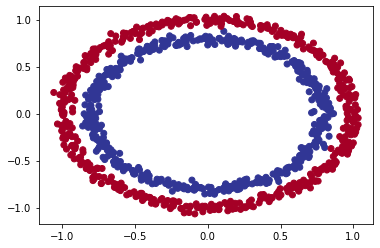

In [5]:
#vizualize with a plot

import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

##### Input Shape

In [6]:
#Input and Output Shape
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
#no of samples
len(X), len(y)

(1000, 1000)

In [8]:
#View First examples of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

##### Steps in modelling

* Create Model
* Compile
* Fit
* Evaluate
* Tweak Evaluate

In [9]:
import tensorflow as tf

In [10]:
#Set Random Seed
tf.random.set_seed(42)

#create
model1= tf.keras.Sequential([
    #Shape = (1000,1)
    tf.keras.layers.Dense(1,activation = "relu")
    #tf.keras.layers.Dense(50,activation = "relu")
    #tf.Keras.layers.Dense(1,activation = "Softmax")
])

#compile
model1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ["accuracy"])

#Fit
model1.fit(X,y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4820


In [11]:
#lets try and improve model
model1.fit(X,y, epochs=100, verbose=0)
model1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932450532913208, 0.5]

###### As 50 % accuracy

In [12]:
#Set seed
tf.random.set_seed(42)

#create
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
  
#Compile Model
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

#Fit Model
model2.fit(X, y, epochs=100, verbose = 0)

In [13]:
model2.evaluate(X,y,)

32/32 [==============================] - 0s 903us/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314204216003, 0.5]

##### improve the model


1. Create a model - Add more layer
2. Compiling a model - Choose Optimization Adam
3. Fitting a model - For more epochs

In [14]:
#set the random seed
tf.random.set_seed(42)

#create
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), #100 neurons
    tf.keras.layers.Dense(10), #10 neurons
    tf.keras.layers.Dense(1) #1 neurons
])

#compile
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

#fit the model
model3.fit(X, y, epochs = 100, verbose=0)

In [15]:
model3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

#### The Visualize

* Take in trained model, features(X) and labels (y)
* Create meshgrid of different X values
* Prediction across mesh grid
* Plot predictions as well as lines between Zones

In [16]:
import numpy as np

def plot_decision_boundry(model, X, y):
    
    #define axis boundry and create mesh grid
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    #create x value
    x_in = np.c_[xx.ravel(), yy.ravel()] #Stack 2d array's together
    
    #make predictions
    y_pred = model.predict(x_in) 
    
    #check for multiclass
    if len(y_pred[0]) > 1:
        print("Doing multiclass")
        #reshape to them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    #plot the decison boundry
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

doing binary classification


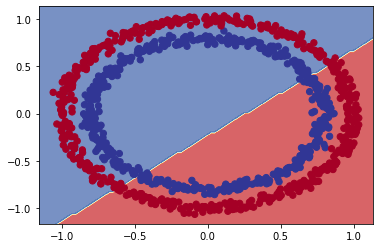

In [17]:
#check predictions
plot_decision_boundry(model3,X,y)

In [18]:
#set seed
tf.random.set_seed(42)

#create model
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

#compile
model4.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

#fit
history = model4.fit(X,y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9642 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8626 - accuracy: 0.4100
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8123 - accuracy: 0.4160
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7802 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7419 - accuracy: 0.4220
Epoch 11/

32/32 [==============================] - 0s 1000us/step - loss: 0.7214 - accuracy: 0.4830
Epoch 83/100
32/32 [==============================] - 0s 995us/step - loss: 0.7204 - accuracy: 0.4840
Epoch 84/100
32/32 [==============================] - 0s 960us/step - loss: 0.7193 - accuracy: 0.4840
Epoch 85/100
32/32 [==============================] - 0s 902us/step - loss: 0.7182 - accuracy: 0.4860
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7173 - accuracy: 0.4880
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7163 - accuracy: 0.4880
Epoch 88/100
32/32 [==============================] - 0s 1000us/step - loss: 0.7154 - accuracy: 0.4880
Epoch 89/100
32/32 [==============================] - 0s 935us/step - loss: 0.7145 - accuracy: 0.4880
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7136 - accuracy: 0.4880
Epoch 91/100
32/32 [==============================] - 0s 1000us/step - loss: 0.7128 - accuracy: 0.4

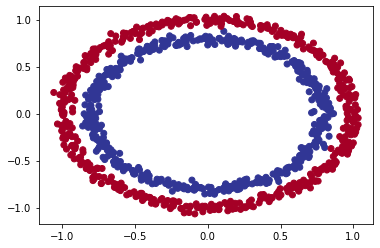

In [19]:
#check out our data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

doing binary classification


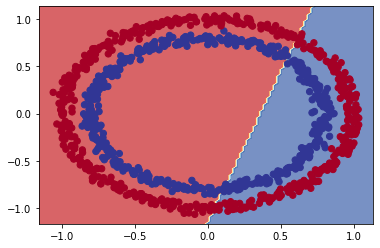

In [20]:
#check decision boundry
plot_decision_boundry(model=model4, X=X, y=y)

In [21]:
#set seed
tf.random.set_seed(42)

#create model non linear
model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

#compile model
model5.compile(loss="binary_crossentropy",
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

#fit the model
history = model5.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9642 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8626 - accuracy: 0.4100
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8123 - accuracy: 0.4160
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7802 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7419 - accuracy: 0.4220
Epoch 11/

32/32 [==============================] - 0s 935us/step - loss: 0.7214 - accuracy: 0.4830
Epoch 83/100
32/32 [==============================] - 0s 968us/step - loss: 0.7204 - accuracy: 0.4840
Epoch 84/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7193 - accuracy: 0.4840
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7182 - accuracy: 0.4860
Epoch 86/100
32/32 [==============================] - 0s 995us/step - loss: 0.7173 - accuracy: 0.4880
Epoch 87/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7163 - accuracy: 0.4880
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7154 - accuracy: 0.4880
Epoch 89/100
32/32 [==============================] - 0s 995us/step - loss: 0.7145 - accuracy: 0.4880
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7136 - accuracy: 0.4880
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7128 - accuracy: 0.4910
Epoch

In [22]:
#replicate multilayer neural network
#set seed
tf.random.set_seed(42)

#create
model6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

model6.compile(loss="binary_crossentropy",
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ["accuracy"])

#fit the model
model6.fit(X, y, epochs = 250)

Epoch 1/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

Epoch 83/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 84/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 85/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 86/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 87/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 88/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 89/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 90/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 91/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 92/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


32/32 [==============================] - 0s 970us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 165/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 166/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 167/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 168/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 169/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 170/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 171/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 172/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 173/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Ep

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 246/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 247/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 248/250
32/32 [==============================] - 0s 1000us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 249/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 250/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


In [23]:
#evaluate
model6.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binary classification


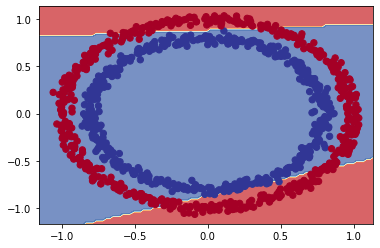

In [24]:
plot_decision_boundry(model6, X, y)

In [25]:
#set seed
tf.random.set_seed(42)

#create model
model7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

#compile
model7.compile(loss="binary_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

#fit
history = model7.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 0.4360 - accuracy: 0.9630
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4260 - accuracy: 0.9690
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.9700
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.9740
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3962 - accuracy: 0.9750
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3873 - accuracy: 0.9720
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3795 - accuracy: 0.9750
Epoch 90/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3716 - accuracy: 0.9750
Epoch 91/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3635 - accuracy: 0.9840
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3554 - accuracy: 0.9830
Epoch 93/100


In [26]:
#evaluate
model7.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

doing binary classification


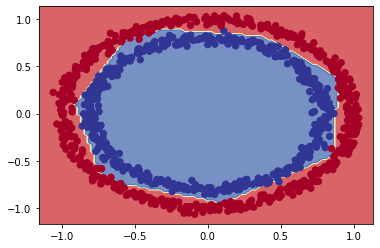

In [27]:
#visualize
plot_decision_boundry(model7, X, y)

The combination of linear and non linear function is one of the key fundamentals of neural network

In [28]:
#create toy tensor
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

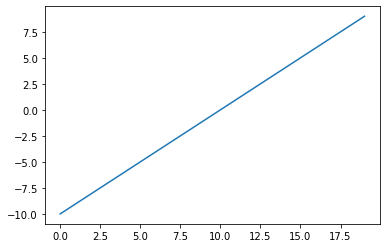

In [29]:
plt.plot(A)

In [30]:
#replicating sigmoid
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

sig_A=sigmoid(A)

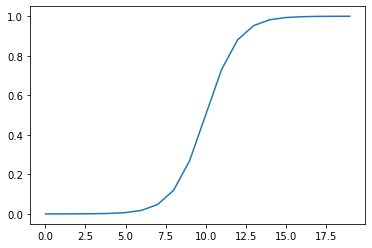

In [31]:
plt.plot(sig_A)

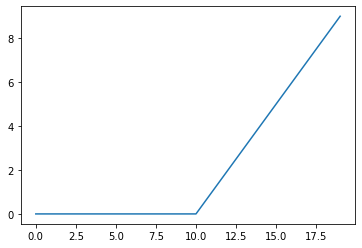

In [32]:
#recreate Relu func
def relu(x):
    return tf.maximum(0,x)

#pass our toy tensor
plt.plot(relu(A))

In [33]:
#linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

##### evaluating and improving

In [34]:
#check how many examples we have
len(X)

1000

In [35]:
#Split into train and test 
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [36]:
#let's recreate and evaluate on test data

#set seed
tf.random.set_seed(42)

#create model
model8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

#compile
model8.compile(loss="binary_crossentropy",
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics=["accuracy"])

#fit
history = model8.fit(X_train, y_train, epochs = 25)

Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [37]:
model8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885135769844, 1.0]

doing binary classification
doing binary classification


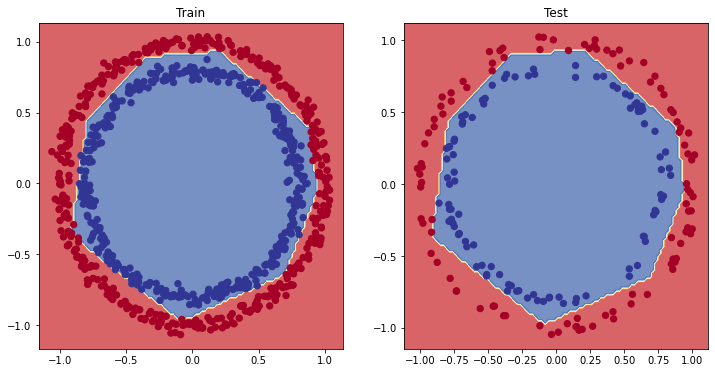

In [38]:
#plot decision boundry
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundry(model8, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundry(model8, X=X_test, y=y_test)

In [39]:
history.history

{'loss': [0.6846511960029602,
  0.6777210235595703,
  0.6735944151878357,
  0.6681485772132874,
  0.6632686853408813,
  0.6545671820640564,
  0.6412575244903564,
  0.6264280676841736,
  0.6038310527801514,
  0.5714035630226135,
  0.540442943572998,
  0.5015039443969727,
  0.468331903219223,
  0.4113016128540039,
  0.3625060021877289,
  0.32090437412261963,
  0.28470802307128906,
  0.25971999764442444,
  0.23746901750564575,
  0.21351958811283112,
  0.1938202828168869,
  0.17524370551109314,
  0.16189303994178772,
  0.1549890786409378,
  0.14897286891937256],
 'accuracy': [0.5425000190734863,
  0.5525000095367432,
  0.5512499809265137,
  0.5774999856948853,
  0.5849999785423279,
  0.5837500095367432,
  0.675000011920929,
  0.7012500166893005,
  0.7487499713897705,
  0.7737500071525574,
  0.7649999856948853,
  0.7837499976158142,
  0.7975000143051147,
  0.8450000286102295,
  0.9125000238418579,
  0.9312499761581421,
  0.9487500190734863,
  0.9524999856948853,
  0.956250011920929,
  0.966

In [40]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673594,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'Model8 Loss curve')

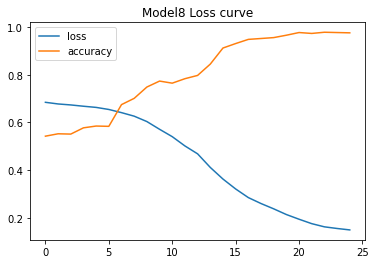

In [41]:
#plot loss
pd.DataFrame(history.history).plot()
plt.title("Model8 Loss curve")

##### Finding Best Learning Rate

* Callback - extra functionality during training
* Modified Loss Curves

In [42]:
#set random seed
tf.random.set_seed(42)

#create a model
model9=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile
model9.compile(loss="binary_crossentropy",
              optimizer = "Adam",
              metrics = ["accuracy"])

#callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

#fit
history_9 = model9.fit(X_train,y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1000us/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - lo

25/25 [==============================] - 0s 1000us/step - loss: 0.5487 - accuracy: 0.6900 - lr: 0.3548
Epoch 73/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5382 - accuracy: 0.6888 - lr: 0.3981
Epoch 74/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6783 - accuracy: 0.5800 - lr: 0.4467
Epoch 75/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5507 - accuracy: 0.7538 - lr: 0.5012
Epoch 76/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4724 - accuracy: 0.8075 - lr: 0.5623
Epoch 77/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5994 - accuracy: 0.7113 - lr: 0.6310
Epoch 78/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6006 - accuracy: 0.6150 - lr: 0.7079
Epoch 79/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5600 - accuracy: 0.6900 - lr: 0.7943
Epoch 80/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5524 - accuracy: 0.6862 - lr: 

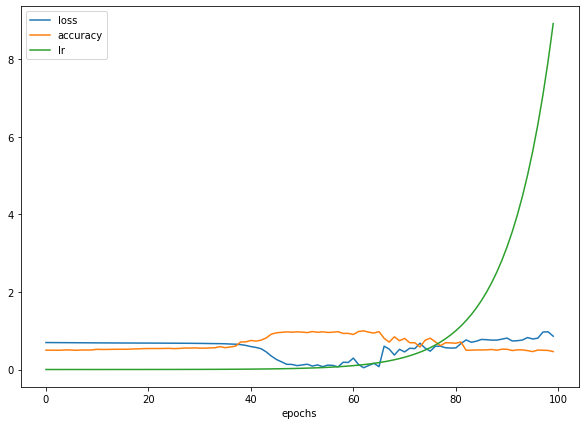

In [43]:
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs");

Text(0.5, 1.0, 'Learning Rate vs Loss')

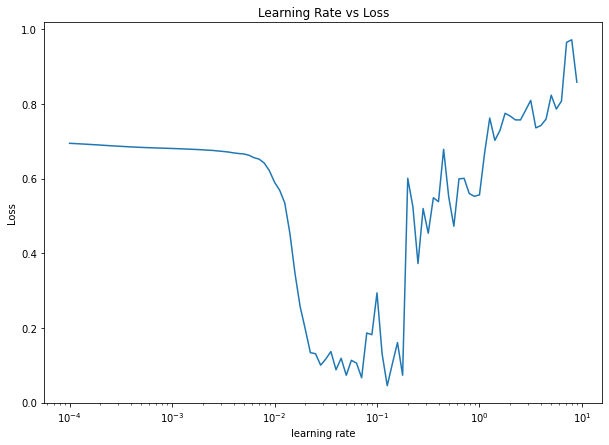

In [44]:
#plot learn rate vs loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

In [45]:
len(lrs)

100

In [46]:
#example of other learning rate
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [47]:
#lets try with ideal Rate

#set random seed
tf.random.set_seed(42)

model10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile with ideal learning rate
model10.compile(loss="binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
               metrics=["accuracy"])

#fit
history10 = model10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

In [48]:
model10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0574 - accuracy: 0.9900


[0.057401832193136215, 0.9900000095367432]

doing binary classification
doing binary classification


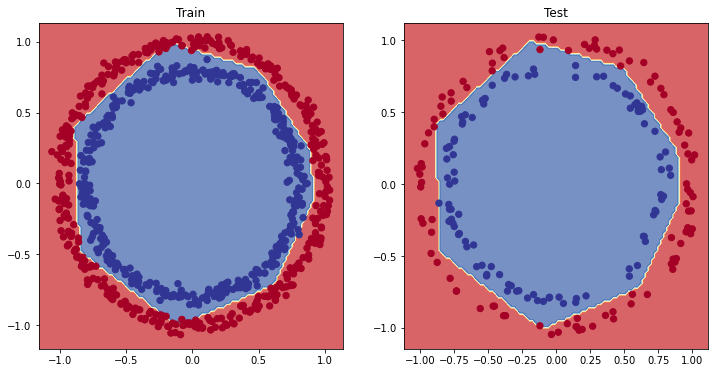

In [49]:
#plot decision boundries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundry(model10, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundry(model10, X=X_test, y=y_test)

#more classification evaluation metrics

* Accuracy
* Precision
* Recall
* F1 Score
* Confusion Matrix
* Classification Report (from scikit-learn)

In [50]:
#check accuracy
loss, accuracy = model10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 999us/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set: 0.057401832193136215
Model accuracy on the test set: 99.00%


In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
y_pred = model10.predict(X_test)
tf.round(y_pred)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [53]:
confusion_matrix(y_test, tf.round(y_pred))

array([[99,  2],
       [ 0, 99]], dtype=int64)

Plot Confusion Matrix
#scikit #plot_confusion_matrix

In [85]:
import itertools

def make_confusion_matrix(y_true, y_pred, classes=None, figsize = (10,10), text_size=15):

    #confusion matrix 
    cm=confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]
    n_classes = cm.shape[0]

    #prettify
    fig, ax = plt.subplots(figsize=figsize)

    #create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    #Set label to classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    #label the axes
    ax.set(title="Confusion Matrix",
          xlabel = "Predicted Label",
          ylabel = "True Label",
          xticks = np.arange(n_classes),
          yticks = np.arange(n_classes),
          xticklabels = labels,
          yticklabels = labels)

    #set xaxis labels to bottom
    ax.xaxis.set_label_position("bottom") 
    ax.xaxis.tick_bottom()

    #adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    #Set threshold
    threshold = (cm.max() + cm.min())/2

    #plot text on each cell
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)")

In [55]:
cm_norm

array([[0.98019802, 0.01980198],
       [0.        , 1.        ]])

In [56]:
cm.shape[0]

2

#### Multiclass Classification

When you have more than 2 classes, it is multiclass classification

In [57]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#As data is already sorted into train and test
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [58]:
#show first training sample
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [59]:
#check shape of single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

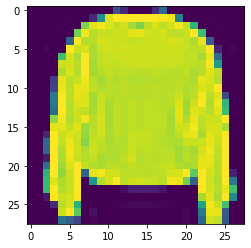

In [60]:
#plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [61]:
#check sample labels
train_labels[7]

2

In [62]:
#create a small list to index training labels to make human readable
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Sandal')

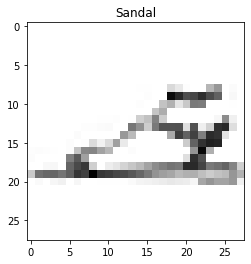

In [63]:
#plot example image
index_of_choice = 300
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

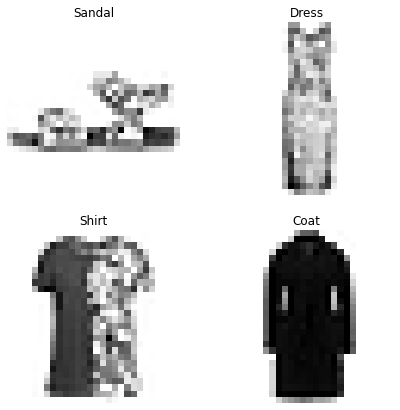

In [64]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

##### Building Multiclass classification Model

###### For classification model

* Input Shape = (Shape of 1 image)
* Output Shape = (One per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
** If labels are one hot encoded = Categorical Encoding, If Integer = SparseCategoricalEncoding
* Output layer Activation = Softmax

In [65]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [66]:
#Our data needs to be flattened,
#Neural networks like 1 long vector
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [67]:
#Set Random seed
tf.random.set_seed(42)

#create
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#compile 
model_11.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
non_norm_history = model_11.fit(train_data, tf.one_hot(train_labels, depth=10), epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.1608 - accuracy: 0.1639 - val_loss: 1.7971 - val_accuracy: 0.2073
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.7081 - accuracy: 0.2487 - val_loss: 1.6460 - val_accuracy: 0.2800
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6278 - accuracy: 0.2824 - val_loss: 1.6023 - val_accuracy: 0.2910
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6092 - accuracy: 0.2827 - val_loss: 1.5968 - val_accuracy: 0.2888
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5956 - accuracy: 0.2927 - val_loss: 1.5808 - val_accuracy: 0.3039
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5921 - accuracy: 0.3008 - val_loss: 1.5695 - val_accuracy: 0.3060
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5806 - accuracy: 0.3111 - val_loss: 1.5695 - val_accuracy:

In [69]:
#check summary
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 4)                 3140      
                                                                 
 dense_24 (Dense)            (None, 4)                 20        
                                                                 
 dense_25 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [70]:
#check the min and max values of training data
train_data.min(), train_data.max()

(0, 255)

Neural network prefer data to be scaled (Or normalized), this means they like to have the numbers in the tensors they try to find patterns  between 0 and 1

We can get our training and testing data between 0 and 1 by dividing by Maximum

In [71]:
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

#check min and max values
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [73]:
#set seed
tf.random.set_seed(42)

#create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

#compile
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#fit
norm_histroy = model_12.fit(train_data_norm,
                            train_labels, epochs = 10,
                            validation_data = (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

###### Neural network tend to perform in numerical form as well as scaled / normalized (numbers between 0 and 1)

<AxesSubplot:title={'center':'Normalized Data'}>

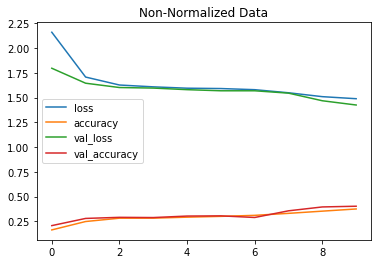

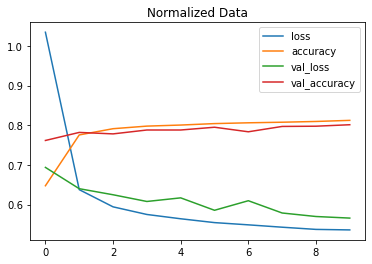

In [75]:
import pandas as pd

#plot non normalized data
pd.DataFrame(non_norm_history.history).plot(title="Non-Normalized Data")

#Plot normalized data loss curves
pd.DataFrame(norm_histroy.history).plot(title = "Normalized Data")

The same model with slight different data, Can produce dramatically different results. So When making comparison , make sure you are comparing on the same criteria (Eg Same Architechture, different data or Same Data, Different Architecture)

In [77]:
#Ideal Learning Rate

#set seed
tf.random.set_seed(42)

#create Model
model13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

#compile
model13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

#learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

#fit
find_lr_history = model13.fit(train_data_norm,
                             train_labels,
                             epochs = 40,
                             validation_data = (test_data_norm, test_labels),
                             callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 4s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 2s

Text(0.5, 1.0, 'Finding Ideal Learning Rate')

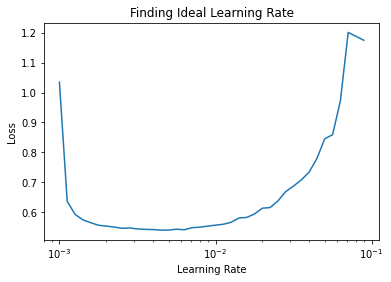

In [78]:
#plot decay curve

import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding Ideal Learning Rate")

In [79]:
10**-3

0.001

In [83]:
#lets refit model with ideal learning rate

#set random seed
tf.random.set_seed(42)

#create model
model14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

#compile
model14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
               metrics = ["accuracy"])

#fit
history14 = model14.fit(train_data_norm,
                        train_labels,
                        epochs = 20,
                        validation_data = (test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

##### Evaluating our multi-class classification model

* Confusion matrix
* Use Data Visualization

In [89]:
#make predictions

y_probs = model14.predict(test_data_norm) #probs = prediction probabilities

#first 5 predictions
y_probs[:5]

array([[8.5629982e-11, 3.5361769e-13, 2.6633732e-05, 4.6356295e-08,
        5.0949817e-05, 9.6118927e-02, 8.1778047e-08, 9.1869034e-02,
        4.0605087e-03, 8.0787373e-01],
       [3.4278621e-06, 1.2899216e-16, 9.5989150e-01, 2.0516354e-07,
        1.5329231e-02, 2.4532478e-13, 2.4142873e-02, 1.1383274e-28,
        6.3272589e-04, 4.4789129e-08],
       [6.1062710e-05, 9.9657673e-01, 4.3866475e-08, 3.3405658e-03,
        1.3249347e-05, 1.4383106e-21, 8.2789820e-06, 7.3236338e-18,
        5.4810872e-08, 4.9224388e-14],
       [7.5031574e-05, 9.9053687e-01, 4.2528450e-07, 9.2231557e-03,
        1.3623078e-04, 1.8276090e-18, 2.6808242e-05, 4.8123635e-14,
        1.4521424e-06, 2.2211207e-11],
       [7.2189875e-02, 1.5495756e-06, 2.5566894e-01, 1.0363093e-02,
        4.3541376e-02, 1.1069410e-13, 6.1693031e-01, 6.7543142e-23,
        1.3049159e-03, 1.2140315e-09]], dtype=float32)

In [91]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([8.5629982e-11, 3.5361769e-13, 2.6633732e-05, 4.6356295e-08,
        5.0949817e-05, 9.6118927e-02, 8.1778047e-08, 9.1869034e-02,
        4.0605087e-03, 8.0787373e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [92]:
#conv prediction probability into integers
y_preds = y_probs.argmax(axis=1)

#first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [93]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [95]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = test_labels,
                y_pred = y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]], dtype=int64)

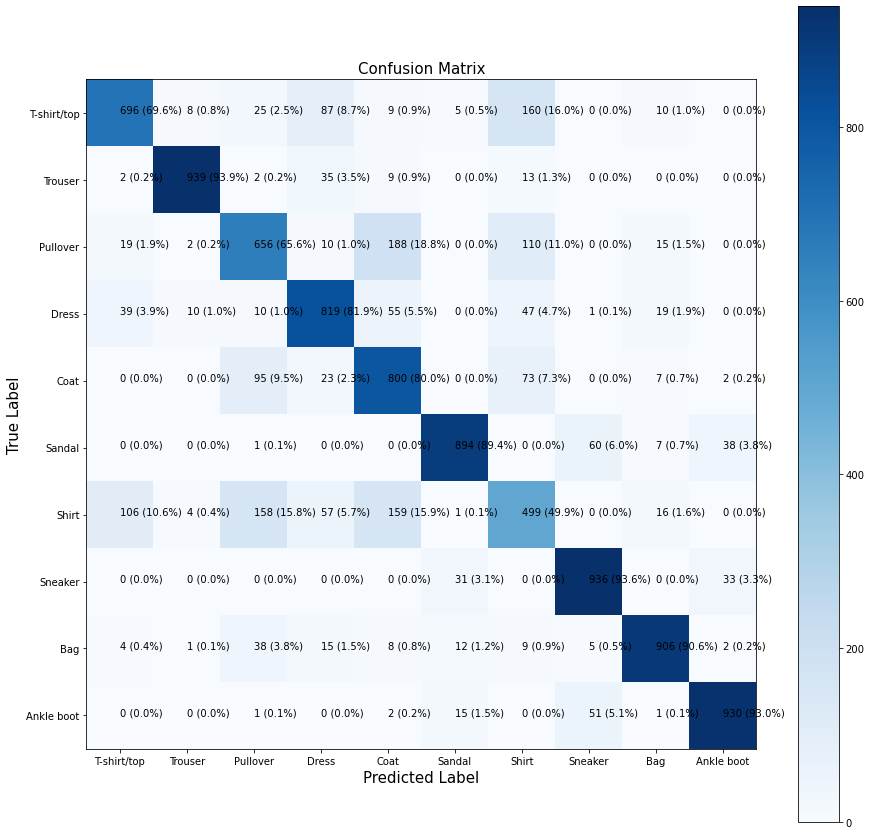

In [101]:
#make pretty confusion matrix
make_confusion_matrix(y_true = test_labels,
                     y_pred = y_preds,
                     classes = class_names,
                     figsize = (15,15),
                     text_size = 15)

#### function for
* plot random image
* make prediction on said image
* label the plot with truth label & predicted label

In [108]:
import random

def plot_random_image(model, images, true_labels, classes):
    """pick random image and plot"""
    #set random number
    i = random.randint(0, len(images))
    
    #create predictions
    target_images = images[i]
    pred_probs = model.predict(target_images.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]
    
    #plot image
    plt.imshow(target_images, cmap=plt.cm.binary)
    
    #change color of title depending on predictions if right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"
        
    #add x label
    plt.xlabel("Pred: {} {:2.0f}%(True: {})".format(pred_label, 100*tf.reduce_max(pred_probs),
                                                    true_label),
               color = color) #set green or red based on right or wrong prediction

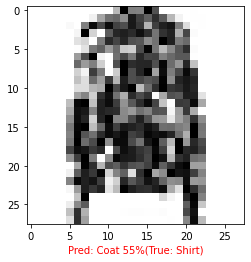

In [120]:
#check random image and predict
plot_random_image(model=model14,
                 images=test_data_norm,
                 true_labels=test_labels,
                 classes = class_names)

What pattern is our model learning ?


In [122]:
model14.layers[1]

In [123]:
#get pattern
weights, biases = model14.layers[1].get_weights()

#get shape
weights, weights.shape

(array([[ 0.7150266 , -0.06077086, -0.9976308 , -1.0484312 ],
        [ 0.27732116, -0.47155362, -0.5291646 ,  0.02329238],
        [ 0.7752429 ,  0.54027545, -1.1288568 , -0.74261546],
        ...,
        [-0.39453447,  0.47628677, -0.22641525,  0.25505912],
        [-0.40515828,  0.61810106,  0.23928423, -0.5038759 ],
        [ 0.23884551,  0.11606929, -0.12131333,  0.04352404]],
       dtype=float32),
 (784, 4))

In [125]:
#check out bias vector

biases, biases.shape

(array([ 2.4486070e-02, -6.1512832e-04, -2.7230212e-01,  8.1124848e-01],
       dtype=float32),
 (4,))

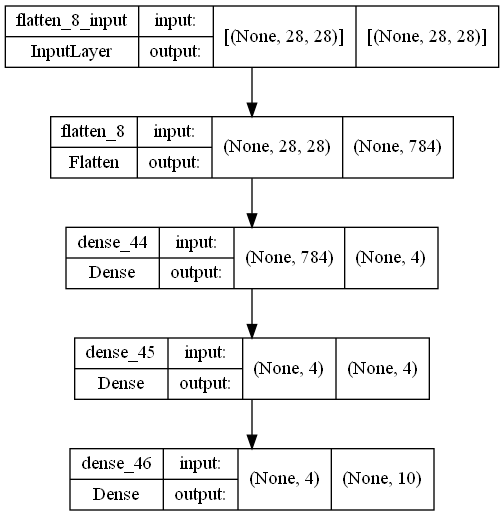

In [129]:
tf.keras.utils.plot_model(model14, show_shapes = True)